<a href="https://www.kaggle.com/tabarkarajab/traffic-flow-analysis-using-seaborn?scriptVersionId=88105361" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hourly-dataset-of-vehicle-for-traffic-analysis/data.csv


# **Importing Libraries**

In [2]:
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from matplotlib import dates as mpl_dates
import pandas as pd


## Loading and Reading CSV file Through Pandas

In [3]:
csv = pd.read_csv(r'../input/hourly-dataset-of-vehicle-for-traffic-analysis/data.csv')

**Getting the head() function which is used to get the first n rows.**


In [4]:
csv.head()

,id,date_time,vehicle_count,Average_hourly,Total_count
0,1,14/07/2021 11:00 a.m,1442,0.092117,15654.0
1,2,14/07/2021 12:00 p.m,1091,0.069695,NaN
2,3,14/07/2021 01:00 p.m,869,0.055513,NaN
3,4,14/07/2021 02:00 p.m,785,0.050147,NaN
4,5,14/07/2021 03:00 p.m,796,0.050850,NaN


/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


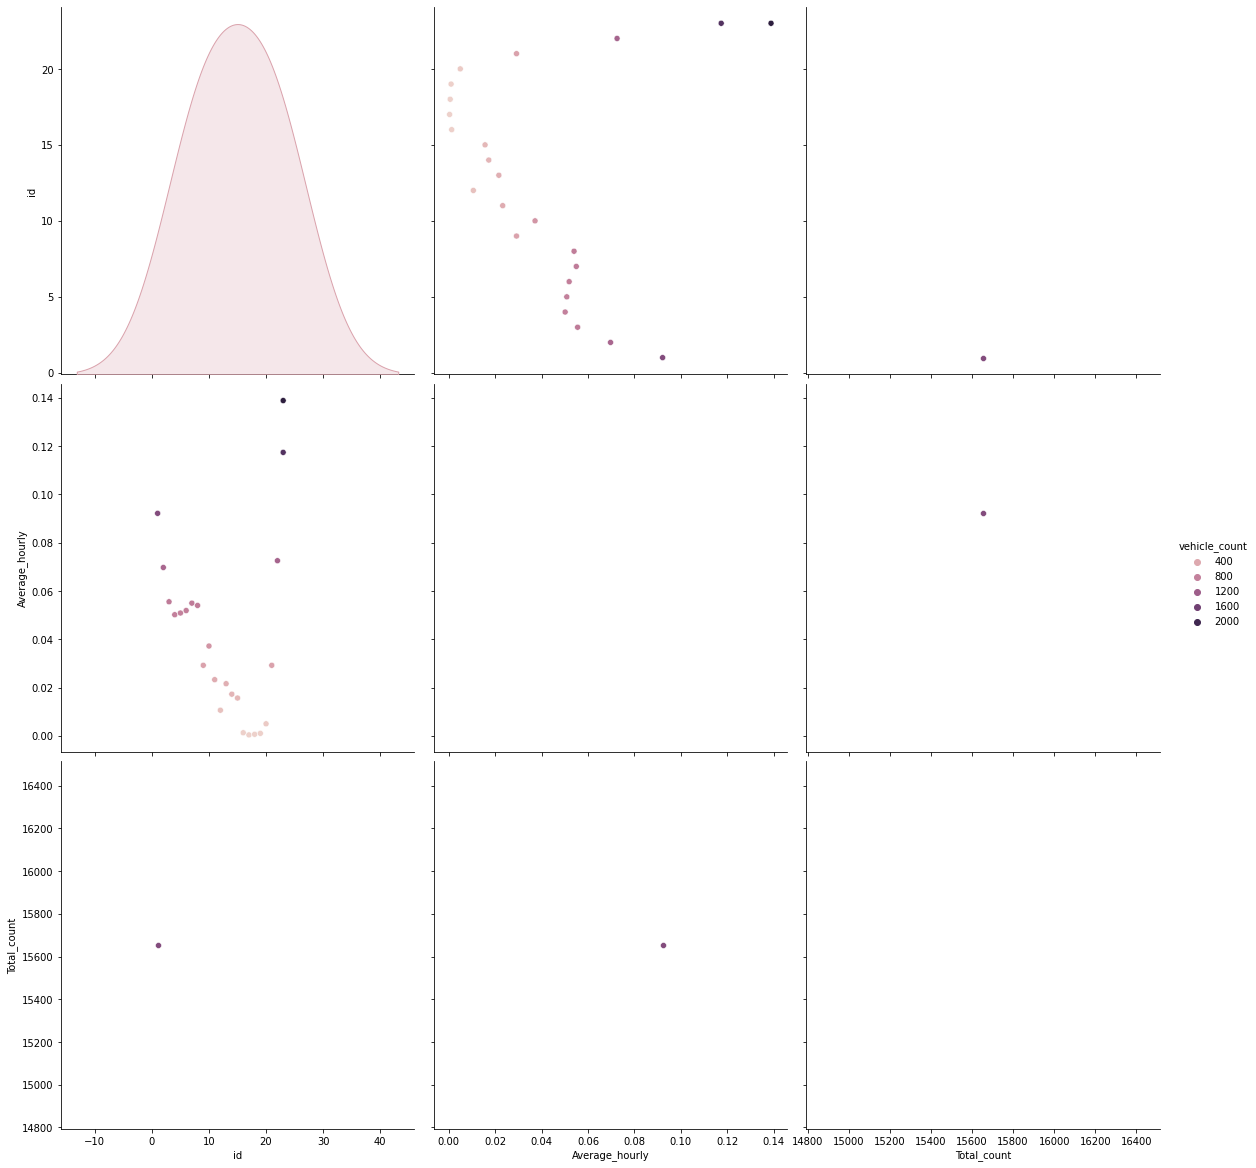

In [5]:
sn.pairplot(csv, hue='vehicle_count', size=5.5)

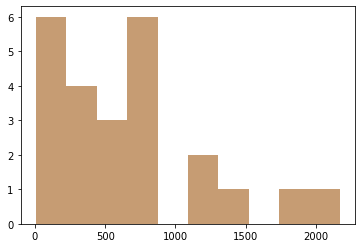

In [6]:
for col in 'xy':
    plt.hist(csv['vehicle_count'], alpha=0.5)

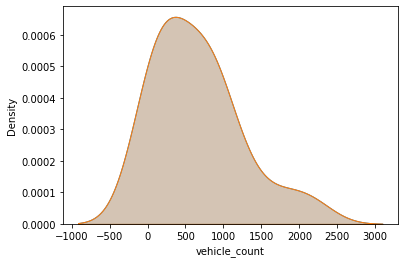

In [7]:
for col in 'xy':
    sn.kdeplot(csv['vehicle_count'], shade=True)

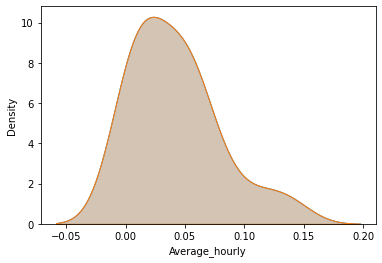

In [8]:
for col in 'xy':
    sn.kdeplot(csv['Average_hourly'], shade=True)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


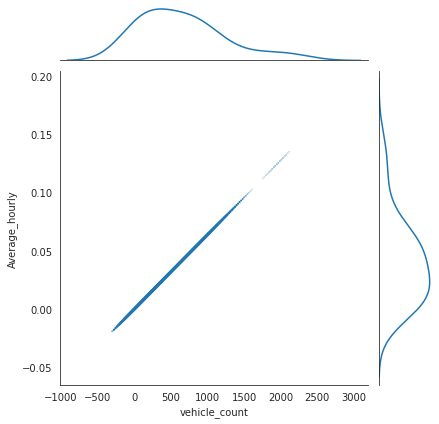

In [9]:
with sn.axes_style('white'):
    sn.jointplot("vehicle_count", "Average_hourly", csv, kind='kde');

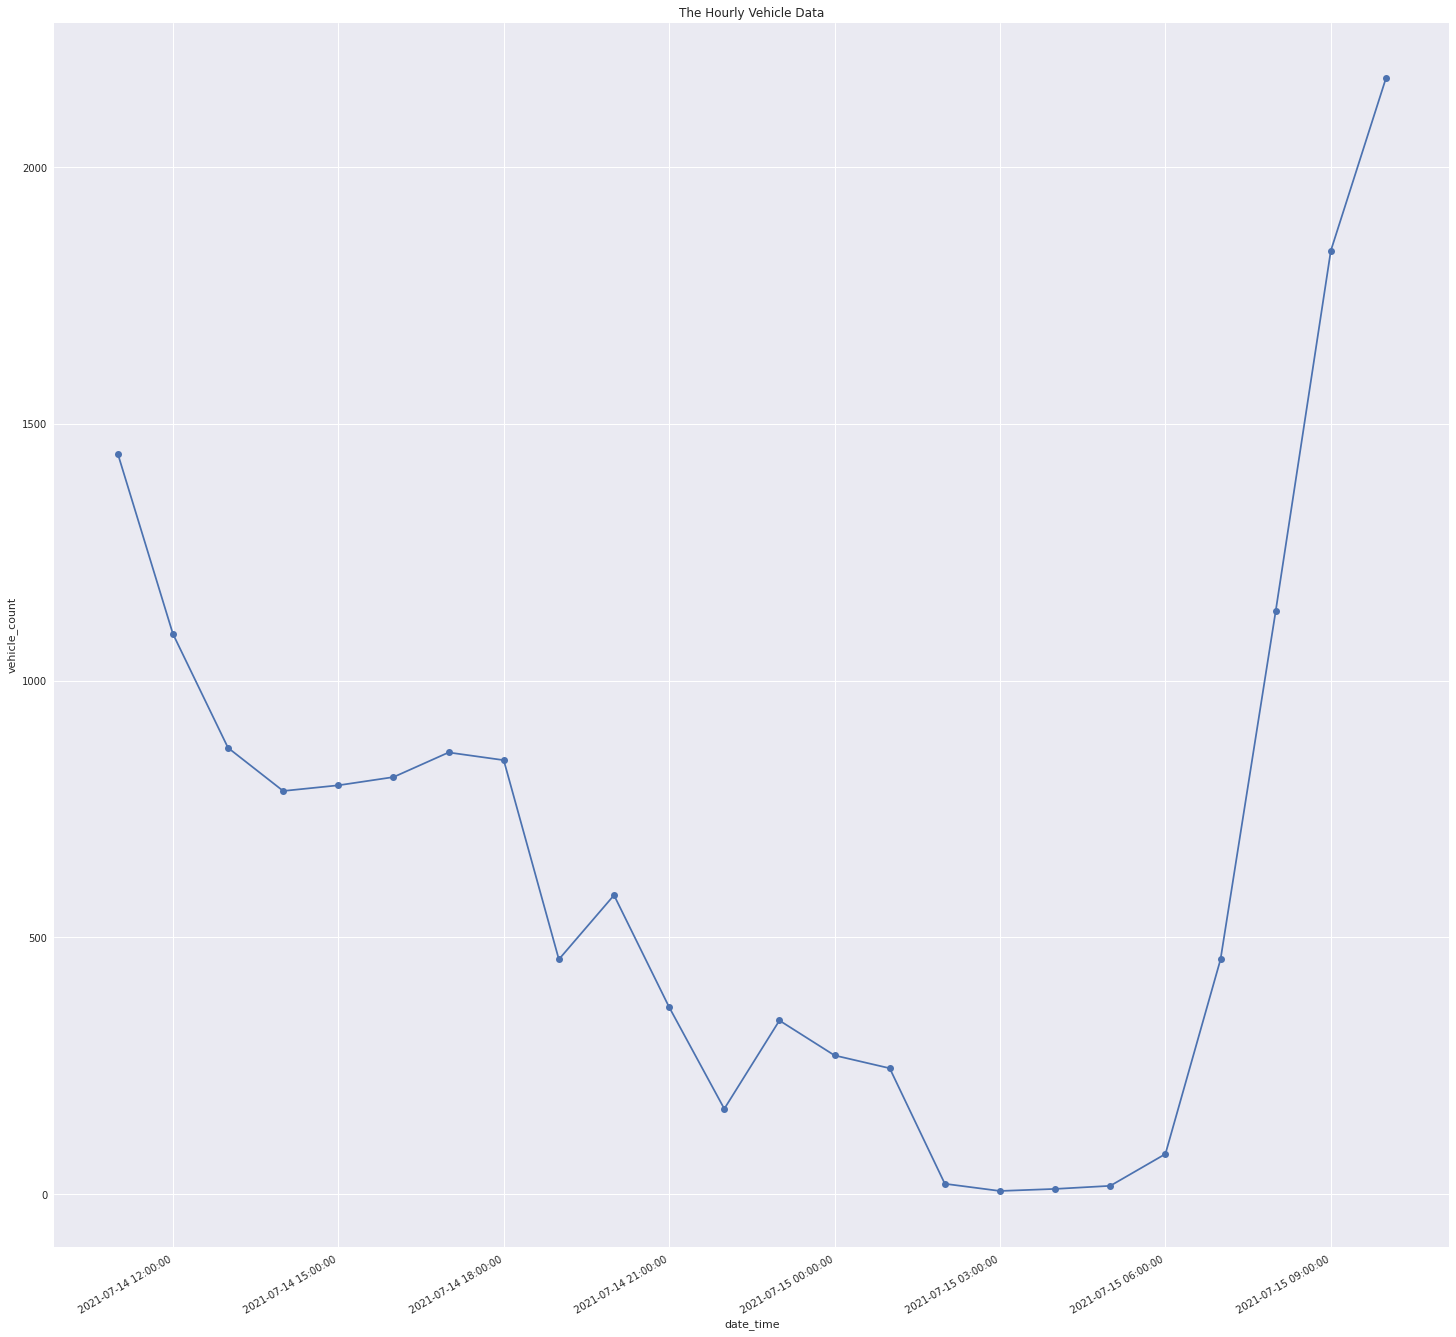

In [10]:
plt.style.use('seaborn')

data = csv
data['date_time'] = pd.to_datetime(data['date_time'])
#data.sort_values('date_time', inplace=True)
date_= data['date_time']
count_ = data['vehicle_count']

# Create figure and plot space
fig, ax = plt.subplots(figsize=(25, 25))
plt.plot_date(date_,count_, linestyle='solid')
plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%Y-%m-%d %H:%M:%S')
plt.gca().xaxis.set_major_formatter(date_format)
# Set title and labels for axes
ax.set(xlabel="date_time",
       ylabel="vehicle_count",
       title="The Hourly Vehicle Data")
plt.show()

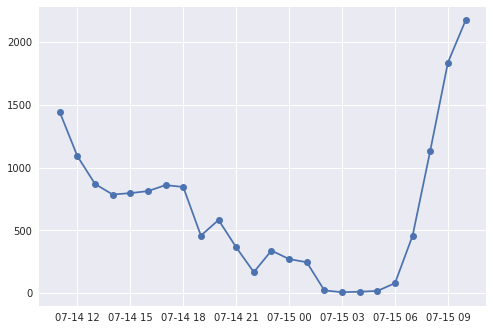

In [11]:
#data = pd.read_csv('plot_time_series.csv')
price_date = csv['date_time']
price_close = csv['vehicle_count']
plt.plot_date(price_date, price_close, linestyle='solid')

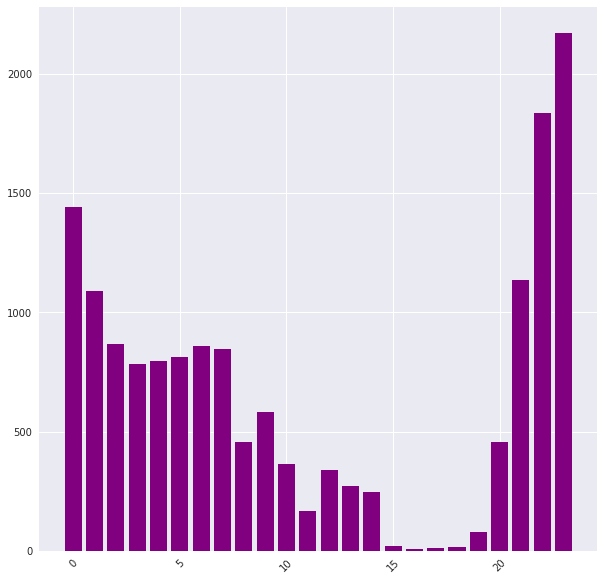

In [12]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.bar(csv.index.values,
        csv['vehicle_count'],
        color='purple')


#res = seaborn.scatterplot(x="date_time", y="vehicle_count", data=csv)
#res.set_xticklabels([pd.to_datetime(tm, unit='ms').strftime('%Y-%m-%d %H:%M:%S') for tm in res.get_xticks()], rotation=45)



# Rotate tick marks on x-axis
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()


# Correlation between Vehicle Parameters

In [13]:
csv.corr()

,id,vehicle_count,Average_hourly,Total_count
id,1.000000,-0.074726,-0.074726,NaN
vehicle_count,-0.074726,1.000000,1.000000,NaN
Average_hourly,-0.074726,1.000000,1.000000,NaN
Total_count,NaN,NaN,NaN,NaN
